# RKNN Model Accuracy Evaluation
Perform inference to access accuracy of RKNN model conversion.

In [1]:
%load_ext autoreload
%autoreload 2

from models import RKNNModel, ONNXModel

import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Plain Visualizations:
Load and preprocess image data

In [2]:
# for yolox models:
from yolox_processing import preprocess, postprocess

# preprocess img:
img = cv2.imread("./test_data/mpe_phone_07_000017.jpg")
reshape_size = (512, 512)

raw_img = img.copy()
img, ratio = preprocess(img, reshape_size)

In [3]:
img.dtype

dtype('float32')

In [8]:
# inferences:
rknn = RKNNModel("./rknn_exports/example/yolox_helmet_v2.rknn", use_sim=False)
output = rknn.forward(img)
output = np.array(output)
print(output[0])

[[[ 9.89257812e-01  3.19091797e-01  6.73339844e-01 ...  0.00000000e+00
    1.07666016e-01  2.28881836e-01]
  [-7.35473633e-02  5.64453125e-01  7.89550781e-01 ...  1.05202198e-04
    8.84399414e-02  1.75170898e-01]
  [ 4.88525391e-01  3.04443359e-01  7.69531250e-01 ...  0.00000000e+00
    8.65478516e-02  1.82983398e-01]
  ...
  [-3.26416016e-01  6.23046875e-01  1.12011719e+00 ...  0.00000000e+00
    3.03192139e-02  2.83203125e-02]
  [-5.48828125e-01  5.99121094e-01  1.14062500e+00 ...  0.00000000e+00
    4.68444824e-02  7.18383789e-02]
  [-4.61914062e-01  7.40234375e-01  1.26660156e+00 ...  0.00000000e+00
    6.69555664e-02  5.89294434e-02]]]


In [5]:
onnx = ONNXModel("./rknn_exports/example/yolox.onnx")
other_output = onnx.forward(img)
other_output = np.array(other_output)
print(other_output[0])

[[[ 1.3947958e+00  8.9716983e-01  1.1427563e+00 ...  1.4901161e-06
    6.5561682e-02  3.5908383e-01]
  [ 1.2582942e+00  1.0433772e+00  1.5203522e+00 ...  1.2010336e-05
    7.1469814e-02  3.9071324e-01]
  [ 8.5860896e-01  1.0891972e+00  1.9478412e+00 ...  3.4868717e-06
    7.8209460e-02  4.6475029e-01]
  ...
  [ 2.1998858e-01  7.7425885e-01 -1.8751447e+00 ...  2.5331974e-05
    6.0268342e-03  2.0748615e-02]
  [ 2.8499740e-01  7.3273385e-01 -1.5642650e+00 ...  3.9249659e-05
    9.6746683e-03  2.0588726e-02]
  [ 3.7139893e-01  7.1759355e-01 -1.0287688e+00 ...  2.3752451e-05
    1.4321536e-02  5.7241052e-02]]]


(5376, 4)
[[0.0000000e+00 0.0000000e+00]
 [9.3040762e-06 1.8428364e-05]
 [0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00]]
[[1.55976404e+03 4.61940460e+01 1.69046033e+03 1.93715073e+02
  8.60828161e-01 0.00000000e+00]
 [9.18345154e+02 4.61411591e+01 1.04751892e+03 1.99538757e+02
  8.47263336e-01 0.00000000e+00]
 [9.13759033e+02 6.89033630e+02 1.04860413e+03 8.40644043e+02
  8.46700430e-01 0.00000000e+00]
 [1.55749365e+03 6.85441650e+02 1.68578748e+03 8.35578735e+02
  8.39040756e-01 0.00000000e+00]
 [2.75104462e+02 6.91306335e+02 4.08508789e+02 8.32760925e+02
  7.96154022e-01 0.00000000e+00]
 [2.79640869e+02 4.79250488e+01 4.06316132e+02 1.94870956e+02
  7.17330933e-01 0.00000000e+00]
 [2.82862030e+02 1.32664709e+03 4.04091064e+02 1.45966138e+03
  5.10775566e-01 0.00000000e+00]
 [1.56308594e+03 1.32054590e+03 1.68988513e+03 1.47274988e+03
  4.72904205e-01 0.00000000e+00]
 [9.23744934e+02 1.32146387e+03 1.0482

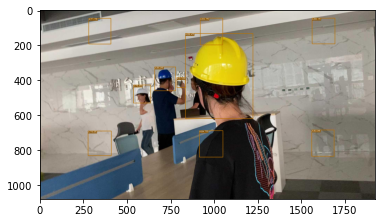

In [9]:
vis_img = postprocess(output, {"raw_img": raw_img, "ratio": ratio, "test_size": reshape_size})
cv2.imwrite("./test_results/1.jpg", vis_img)
vis_img = cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB)
plt.imshow(vis_img)

(5376, 4)
[[9.7694517e-08 5.3507659e-07]
 [8.5837650e-07 4.6925975e-06]
 [2.7270636e-07 1.6205247e-06]
 ...
 [1.5267160e-07 5.2560335e-07]
 [3.7972742e-07 8.0810048e-07]
 [3.4017157e-07 1.3596153e-06]]
[[8.33154663e+02 1.34729431e+02 1.22069263e+03 6.20855591e+02
  8.94085944e-01 0.00000000e+00]
 [6.57698547e+02 3.25855194e+02 7.77015930e+02 4.61185974e+02
  8.69361341e-01 0.00000000e+00]
 [5.35959045e+02 4.28599945e+02 6.34789062e+02 5.31209900e+02
  7.65680850e-01 0.00000000e+00]
 [7.84730530e+02 3.86133698e+02 8.34895264e+02 4.43338196e+02
  5.15537202e-01 0.00000000e+00]
 [8.34638245e+02 2.38722748e+02 9.55071289e+02 4.85261108e+02
  1.26778945e-01 0.00000000e+00]]
[[8.33154663e+02 1.34729431e+02 1.22069263e+03 6.20855591e+02
  8.94085944e-01 0.00000000e+00]
 [6.57698547e+02 3.25855194e+02 7.77015930e+02 4.61185974e+02
  8.69361341e-01 0.00000000e+00]
 [5.35959045e+02 4.28599945e+02 6.34789062e+02 5.31209900e+02
  7.65680850e-01 0.00000000e+00]
 [7.84730530e+02 3.86133698e+02 8.348

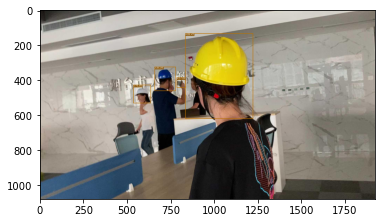

In [7]:
vis_img = postprocess(other_output, {"raw_img": raw_img, "ratio": ratio, "test_size": reshape_size})
cv2.imwrite("./test_results/2.jpg", vis_img)
vis_img = cv2.cvtColor(vis_img, cv2.COLOR_BGR2RGB)
plt.imshow(vis_img)

## Statistical Benchmarks